In [1]:
from metodos.SSLTree.utils.Experiments import cross_val, names

from scipy.stats import rankdata
import numpy as np
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import scikit_posthocs as sp

# Comparativa entre SSLTree, DT y SelfTraining

In [ ]:
all_means = {}

for i, p in enumerate(["10", "20", "30", "40"]):
    print("PERCENTAGE:", p)
    means_ssl = []
    means_dt = []
    means_st = []
    for name in ya_ejecutados:
        print("\tDATASET:", name)
        m_ssl, m_dt, m_st = cross_val(name, p)

        np.save(f"comparativa/{p}/{name}_means.npy", np.array([m_ssl, m_dt, m_st]))

        means_ssl.append(m_ssl)
        means_dt.append(m_dt)
        means_st.append(m_st)

    all_means[p] = np.stack((means_ssl, means_dt, means_st))
np.save("comparativa/all_means.npy", all_means)
print("Resultados guardados")

In [14]:
all_means = np.load("comparativa/all_means.npy", allow_pickle=True).item()
all_mean_rankings = np.empty((3, 4))

for i, p in enumerate(["10", "20", "30", "40"]):
    rankings = rankdata(-all_means[p], method="average", axis=0)
    
    all_mean_rankings[:, i] = np.mean(rankings, axis=1)

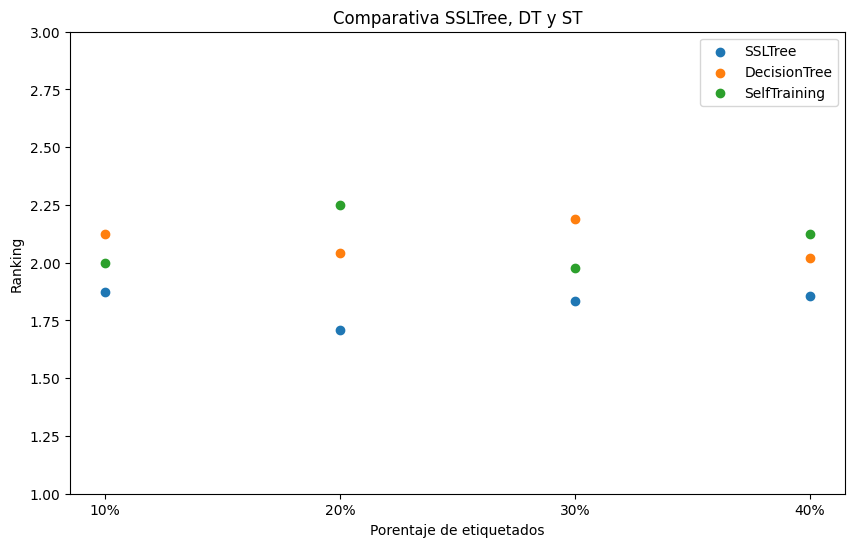

In [15]:
plt.figure(figsize=(10, 6))

classifiers = ["SSLTree", "DecisionTree", "SelfTraining"]
for j, classifier in enumerate(classifiers):
    plt.scatter(["10%", "20%", "30%", "40%"], all_mean_rankings[j], label=classifier)

plt.ylim(1, 3)
plt.xlabel("Porentaje de etiquetados")
plt.ylabel("Ranking")
plt.title("Comparativa SSLTree, DT y ST")

plt.legend()
plt.show()

# Nemenyi Test

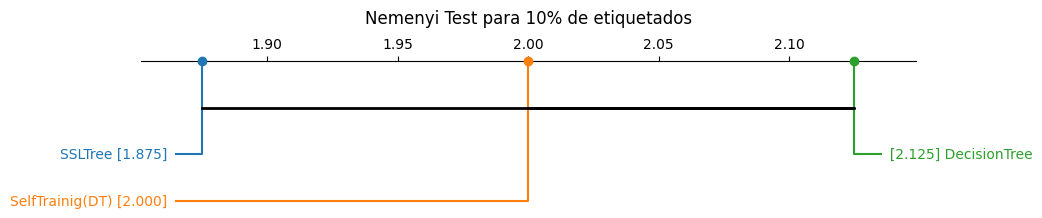

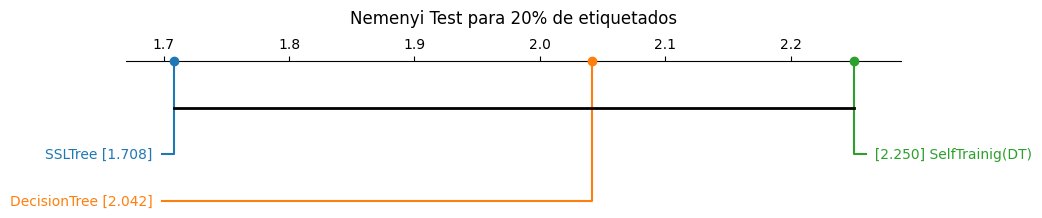

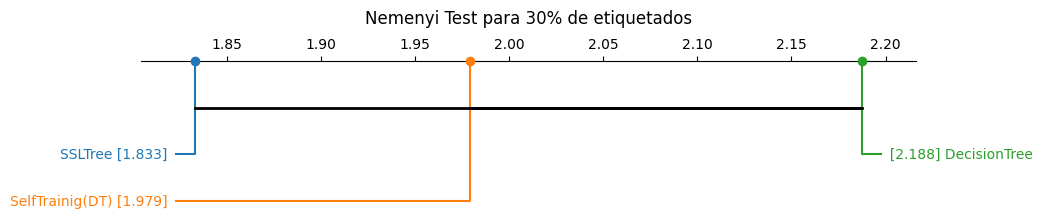

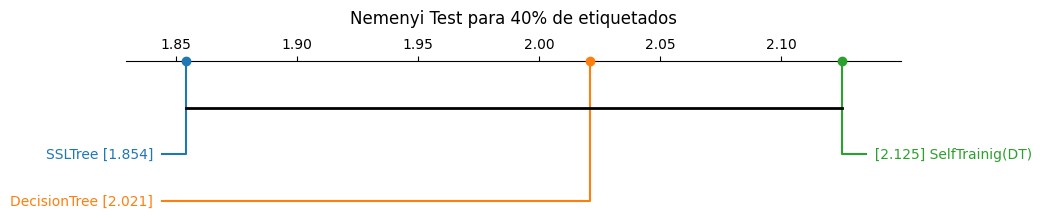

In [16]:
def nemenyi_test(matrix, p):

    dict_data = {
        'SSLTree': matrix[0, :],
        'DecisionTree': matrix[1, :],
        'SelfTrainig(DT)': matrix[2, :]
    }
    
    data_list = [dict_data[key] for key in dict_data]

    results = np.array(data_list).T

    nemenyi_result = sp.posthoc_nemenyi_friedman(results)

    ranks = pd.DataFrame(-results).rank(axis=1, method='average').mean(axis=0)
    ranks.index = list(dict_data.keys())
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        plt.figure(figsize=(10, 2), dpi=100)
        plt.title("Nemenyi Test para " + p + " de etiquetados", pad=10)
        sp.critical_difference_diagram(ranks, nemenyi_result, label_fmt_left='{label} [{rank:.3f}]  ',
                                       label_fmt_right='  [{rank:.3f}] {label}')
        plt.show()


nemenyi_test(all_means["10"], p="10%")
nemenyi_test(all_means["20"], p="20%")
nemenyi_test(all_means["30"], p="30%")
nemenyi_test(all_means["40"], p="40%")